<a href="https://colab.research.google.com/github/OvinduWijethunge/Machine_Learning_Projects/blob/version-1/youtube%20spam%20classifier/Random%20Forest%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#url = 'https://raw.githubusercontent.com/OvinduWijethunge/Machine_Learning_Projects/version-1/youtube%20spam%20classifier/model.csv'
#df = pd.read_csv(url)
df = pd.read_csv('models.csv')

In [3]:
df.head()

,Unnamed: 0,sim_content,sim_comment,word_count,duplicate_word_ratio,length_of_comment,stop_word_ratio,post_coment_gap,black_word_count,comment_duplication,...,num_of_punctuations_1.0,num_of_punctuations_2.0,num_of_punctuations_3.0,num_of_punctuations_4.0,num_of_punctuations_5.0,num_of_punctuations_6.0,is_period_sequence_1,is_link_1,is_youtube_link_1,is_number_1
0,0,-1.038590,-0.870409,1.866549,0.0000,4.274240,0.000000,13.337643,0.222222,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,-1.103307,-0.971247,1.866549,0.0000,4.555200,0.111111,29.017218,0.000000,0.0,...,0,1,0,0,0,0,0,0,0,0
2,2,-1.064844,-0.957045,2.260334,0.0625,5.086086,0.062500,29.017218,0.125000,0.0,...,0,0,0,1,0,0,0,1,1,0
3,3,-0.936203,-0.910982,1.683387,0.0000,3.982309,0.142857,29.017218,0.142857,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,-1.212501,-1.085031,2.122197,0.0000,4.920915,0.000000,29.017218,0.076923,0.0,...,0,0,0,1,0,0,1,1,1,0


In [4]:
df.rename(columns={'Unnamed: 0':'id'},inplace=True)
df.columns

Index(['id', 'sim_content', 'sim_comment', 'word_count',
       'duplicate_word_ratio', 'length_of_comment', 'stop_word_ratio',
       'post_coment_gap', 'black_word_count', 'comment_duplication', 'is_spam',
       'no_of_sentences_2', 'no_of_sentences_3', 'num_of_punctuations_1.0',
       'num_of_punctuations_2.0', 'num_of_punctuations_3.0',
       'num_of_punctuations_4.0', 'num_of_punctuations_5.0',
       'num_of_punctuations_6.0', 'is_period_sequence_1', 'is_link_1',
       'is_youtube_link_1', 'is_number_1'],
      dtype='object')

### Standardization

In [5]:
dfc = df.copy()

In [6]:
y = dfc['is_spam']
X = dfc.drop(['is_spam','id'],axis=1)

### Handle imbalance dataset

In [7]:
dfc['is_spam'].value_counts()

0    6255
1     712
Name: is_spam, dtype: int64

In [8]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

os=RandomOverSampler(0.9)
X_ns,y_ns=os.fit_sample(X,y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_ns)))

X = X_ns
y = y_ns

The number of classes before fit Counter({0: 6255, 1: 712})
The number of classes after fit Counter({0: 6255, 1: 5629})


C:\Users\Acer\anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.9 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 

### Hyperparameter Tuninng

In [11]:
from sklearn.ensemble import RandomForestClassifier 

In [12]:
rf = RandomForestClassifier()

In [13]:
rf.get_params() # hyperParameter list

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [14]:
# RandomizedSearchCV for find the most suited model

In [15]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in range(100,2000,2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [16]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [17]:
random_grid

{'n_estimators': [100,
  119,
  138,
  157,
  176,
  195,
  215,
  234,
  253,
  272,
  291,
  311,
  330,
  349,
  368,
  387,
  407,
  426,
  445,
  464,
  483,
  503,
  522,
  541,
  560,
  579,
  598,
  618,
  637,
  656,
  675,
  694,
  714,
  733,
  752,
  771,
  790,
  810,
  829,
  848,
  867,
  886,
  906,
  925,
  944,
  963,
  982,
  1002,
  1021,
  1040,
  1059,
  1078,
  1097,
  1117,
  1136,
  1155,
  1174,
  1193,
  1213,
  1232,
  1251,
  1270,
  1289,
  1309,
  1328,
  1347,
  1366,
  1385,
  1405,
  1424,
  1443,
  1462,
  1481,
  1501,
  1520,
  1539,
  1558,
  1577,
  1596,
  1616,
  1635,
  1654,
  1673,
  1692,
  1712,
  1731,
  1750,
  1769,
  1788,
  1808,
  1827,
  1846,
  1865,
  1884,
  1904,
  1923,
  1942,
  1961,
  1980,
  2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [100,
  102,
  104,
  106,
  108,
  110,
  112,
  114,
  116,
  118,
  120,
  122,
  124,
  126,
  128,
  130,
  132,
  134,
  136,
  138,
  140,
  142,
  144,
  146,
  148,
  150,


In [18]:
# rf is the base model
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 75, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [19]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=75,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [100, 102, 104, 106, 108,
                                                      110, 112, 114, 116, 118,
                                                      120, 122, 124, 126, 128,
                                                      130, 132, 134, 136, 138,
                                                      140, 142, 144, 146, 148,
                                                      150, 152, 154, 156, 158, ...],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 119, 138, 157,
                                                       

### Evaluate

In [20]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=160, max_features='sqrt',
                       min_samples_split=5, n_estimators=1846)

In [21]:
# get the best model in to instance (for save in disk)
best_model = rf_random.best_estimator_ 

In [22]:
rf_random.best_score_

0.9886984539062862

In [23]:
rf_random.best_params_

{'n_estimators': 1846,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 160,
 'bootstrap': False}

In [24]:
y_pred=rf_random.best_estimator_.predict(X_test)

In [25]:
err = (y_test - y_pred)

In [26]:
err.value_counts()

 0    3538
-1      28
Name: is_spam, dtype: int64

<AxesSubplot:>

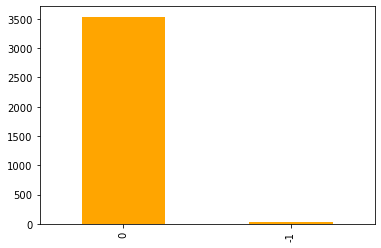

In [27]:
err.value_counts().plot(kind='bar',color='orange')

In [28]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.007851934941110488
MSE: 0.007851934941110488
RMSE: 0.08861114456495012


Text(0, 0.5, 'Feature Importance Score')

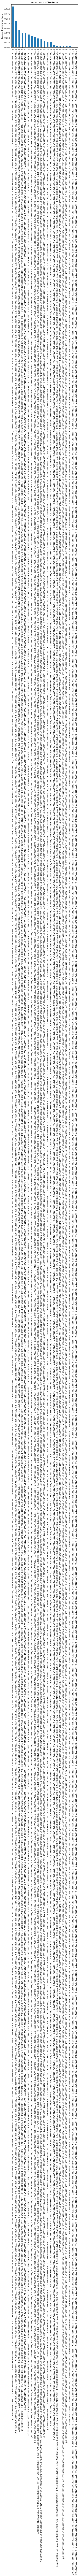

In [29]:
indices=list(X_train)
feat_imp = pd.Series(best_model.feature_importances_, indices).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1871   28]
 [   0 1667]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1899
           1       0.98      1.00      0.99      1667

    accuracy                           0.99      3566
   macro avg       0.99      0.99      0.99      3566
weighted avg       0.99      0.99      0.99      3566



### ROC & AUC

In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [32]:
baseline_roc_auc = roc_auc_score(y_test, best_model.predict(X_test))
fprB, tprB, thresholdsB = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])

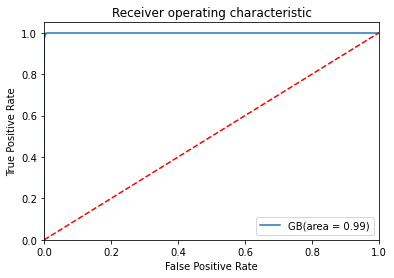

In [33]:
plt.figure()
plt.plot(fprB, tprB, label='GB(area = %0.2f)' % baseline_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Recall - presicion with threshold values

NameError: name 'ffplt' is not defined

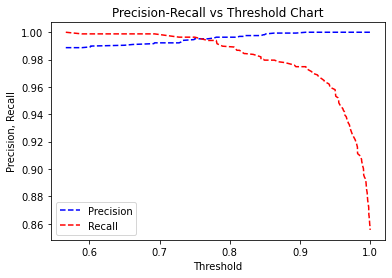

In [34]:
### Predict test_y values and probabilities based on random forest model
probs_y=best_model.predict_proba(X_test) 
  # probs_y is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
ffplt.ylim([0,1])

### After evaluate your best model among from all models then you can change the threshold of chosen model as your requirements as below

In [ ]:
#THRESHOLD = 0.6
#y_pred = np.where(best_model.predict_proba(X_test.values)[:,1] > THRESHOLD, 1, 0)

In [ ]:
#from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

In [ ]:
# we should choose the treshold according to our reqiurement

In [ ]:
# when you go to production mode,
# you should save the model
# you should save the scaler object
# should add your custom threshold value when you predict

In [35]:
import pickle
#open a file, where you ant to store the data
file = open('rfcv2.pkl', 'wb')
# dump information to that file
pickle.dump(best_model, file)
file.close()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  

# get the folder id where you want to save your file
#file = drive.CreateFile({'parents':[{u'id': "https://drive.google.com/drive/u/0/folders/1bgPwYjW2Sz32mFcc7XLfr49Icv9xzW0B"}]})
#file.SetContentFile('random_forest_regression_model.pkl')
#file.Upload() 

In [ ]:
#import os
#os.listdir('.')[5]